In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import emlddmm
import numpy as np
import torch
import json
import os
import transformation_graph_v01 as tg
import importlib
import pickle
import tifffile as tf

In [21]:
reg_list = [
    {
        'registration': [['fluoro','hua141'], ['nissl', 'hua141']],
        'source': '/home/brysongray/data/csh_data/mouse_data/fluoro/',
        'target': '/home/brysongray/data/csh_data/mouse_data/nissl/',
        'config': '/home/brysongray/data/csh_data/mouse_data/configHUA141_nissl_to_fluoro.json',
        'output': '/home/brysongray/data/csh_data/mouse_data/reg_outputs/'
    }
]

In [8]:
reg_list = [
    {
        'registration': [['nissl', 'm519N'], ['myelin', 'm519M']],
        'source': '/home/brysongray/data/marmoset_ccf/M519N-STIF_new/',
        'target': '/home/brysongray/data/marmoset_ccf/m519M-STIF_new/',
        'config': '/home/brysongray/data/marmoset_ccf/configM519_nissl_to_myelin.json',
        'output': '/home/brysongray/data/marmoset_ccf/nissl_to_myelin_outputs/'
    }
]

In [2]:
reg_list = [
    {
        'registration': [['CCF','nissl50'], ['HIST', 'nissl']],
        'source': '/home/brysongray/data/csh_data/ara_nissl_50_bregma.vtk',
        'target': '/home/brysongray/data/csh_data/nissl',
        'config': '/home/brysongray/data/csh_data/configHua141_3d2d.json',
        'output': '/home/brysongray/data/csh_data/output2'
    }
]

registering /home/brysongray/data/csh_data/ara_nissl_50_bregma.vtk to /home/brysongray/data/csh_data/nissl
loading target images


<IPython.core.display.Javascript object>


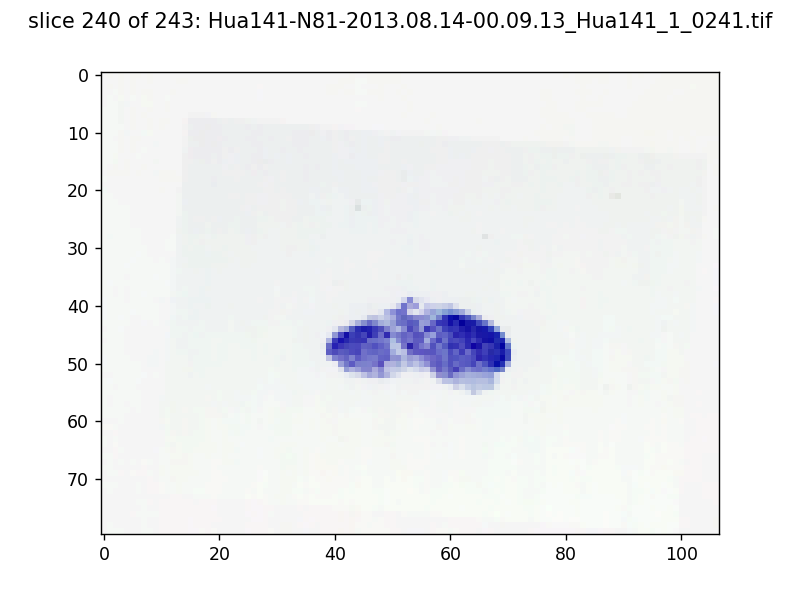

Found 3 scales


<IPython.core.display.Javascript object>


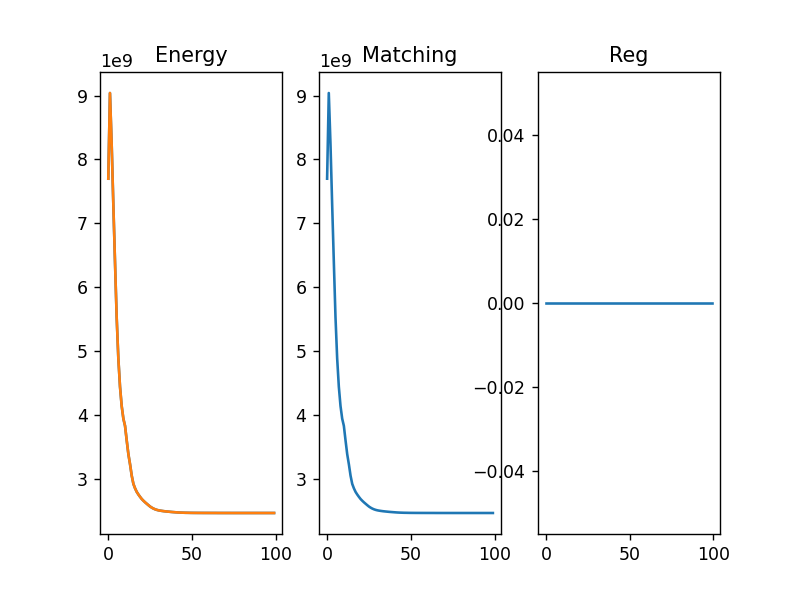

<IPython.core.display.Javascript object>


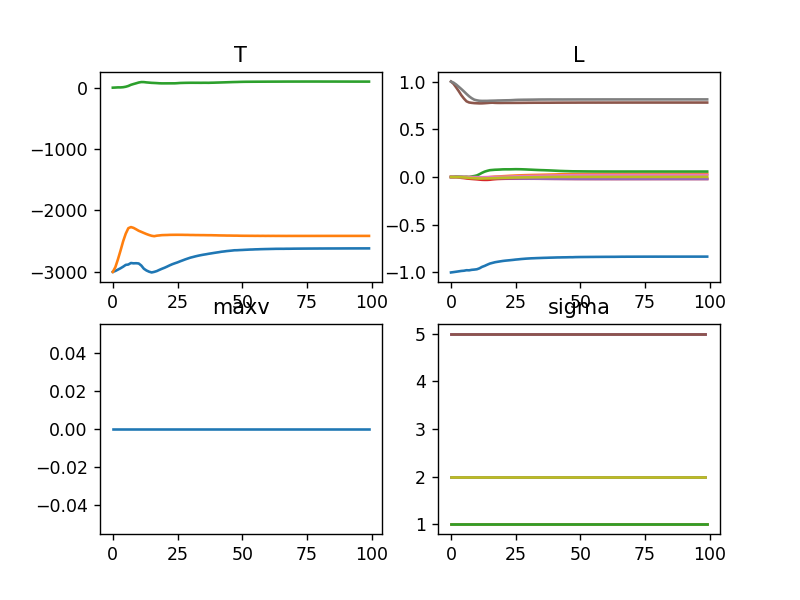

<IPython.core.display.Javascript object>


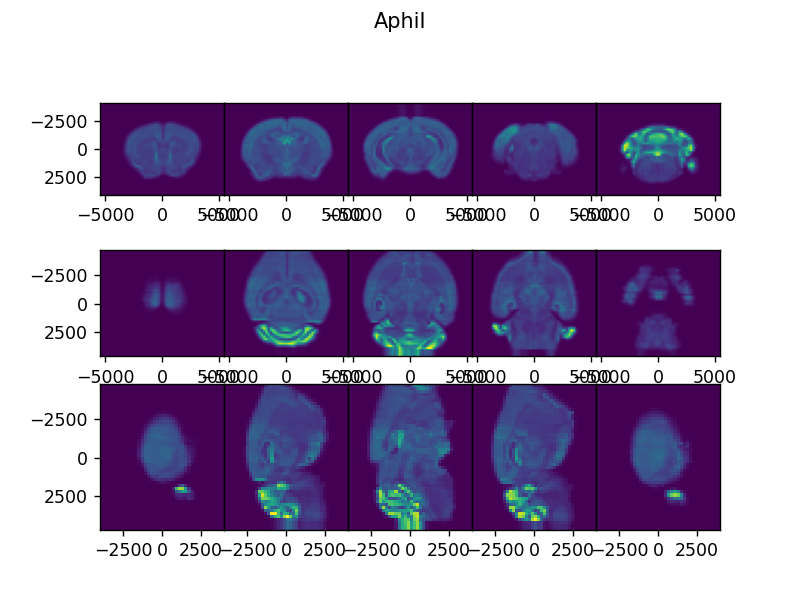

<IPython.core.display.Javascript object>


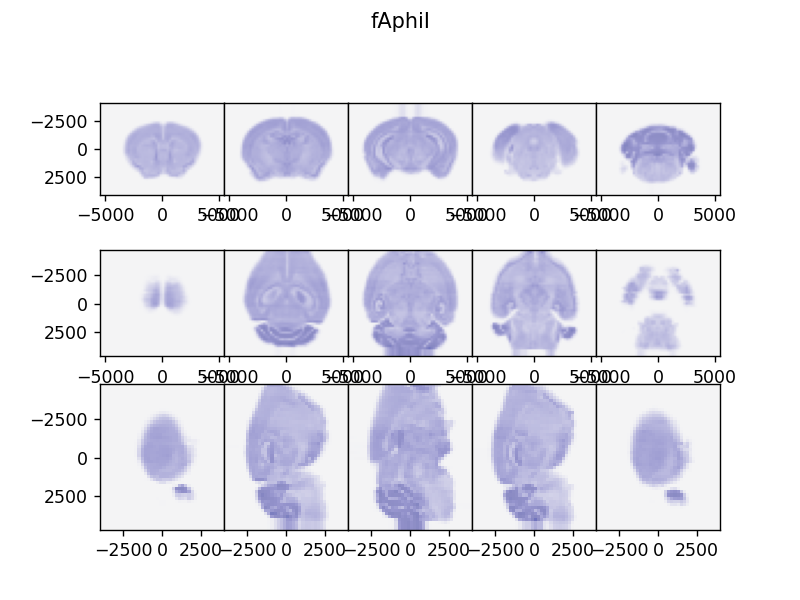

<IPython.core.display.Javascript object>


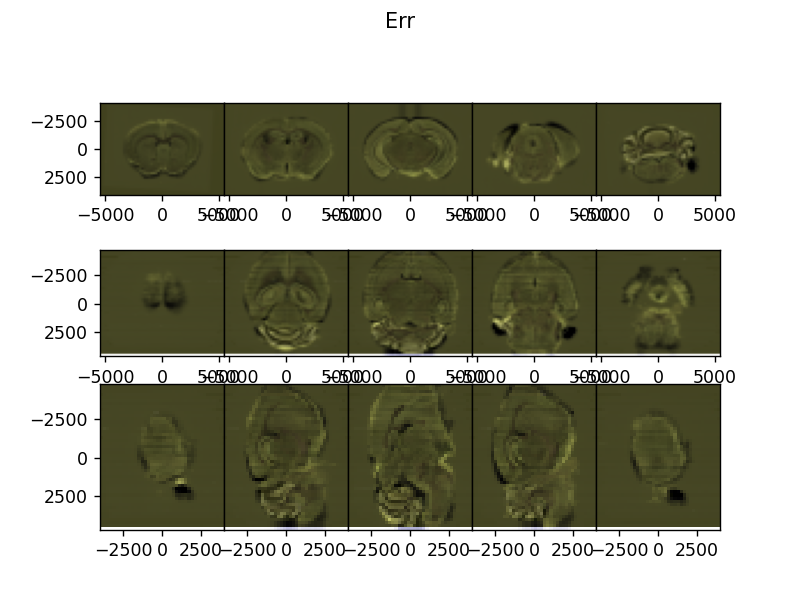

<IPython.core.display.Javascript object>


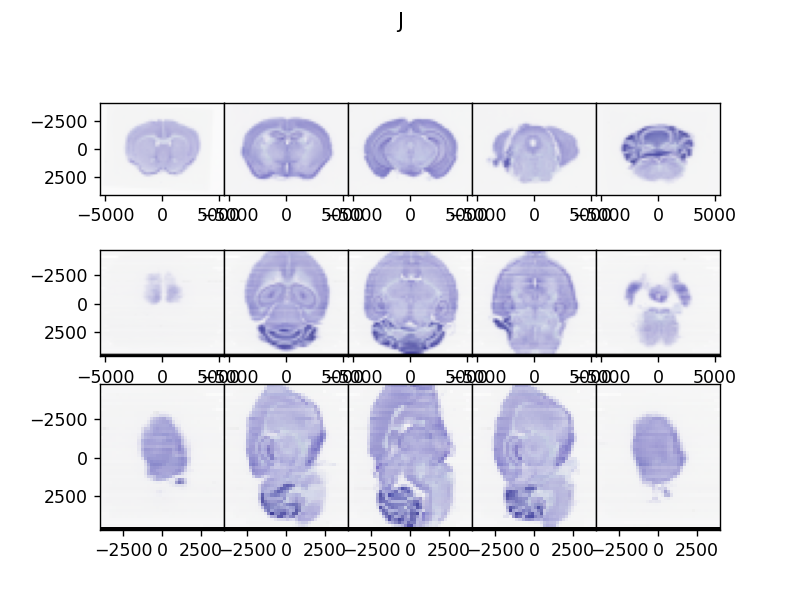

<IPython.core.display.Javascript object>


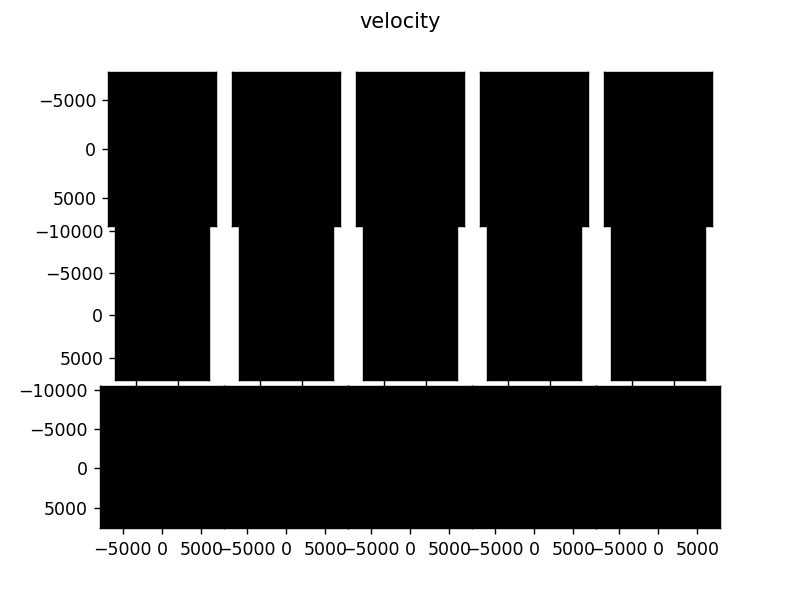

<IPython.core.display.Javascript object>


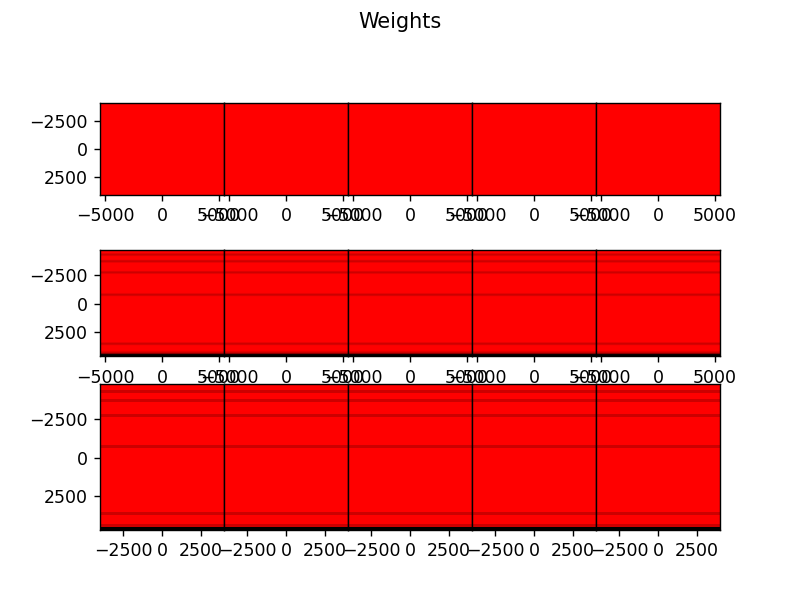

/home/brysongray/emlddmm/emlddmm.py:98: RuntimeWarning: invalid value encountered in true_divide
  J /= (vmax[:,None,None,None] - vmin[:,None,None,None])


Iteration 30, linear oscilating, reducing eA to 18000000.0
Iteration 50, linear oscilating, reducing eA to 16200000.0
Iteration 60, translation oscilating, reducing eA to 14580000.0
Iteration 70, translation oscilating, reducing eA to 13122000.0
Iteration 80, translation oscilating, reducing eA to 11809800.0
Iteration 90, translation oscilating, reducing eA to 10628820.0


<IPython.core.display.Javascript object>


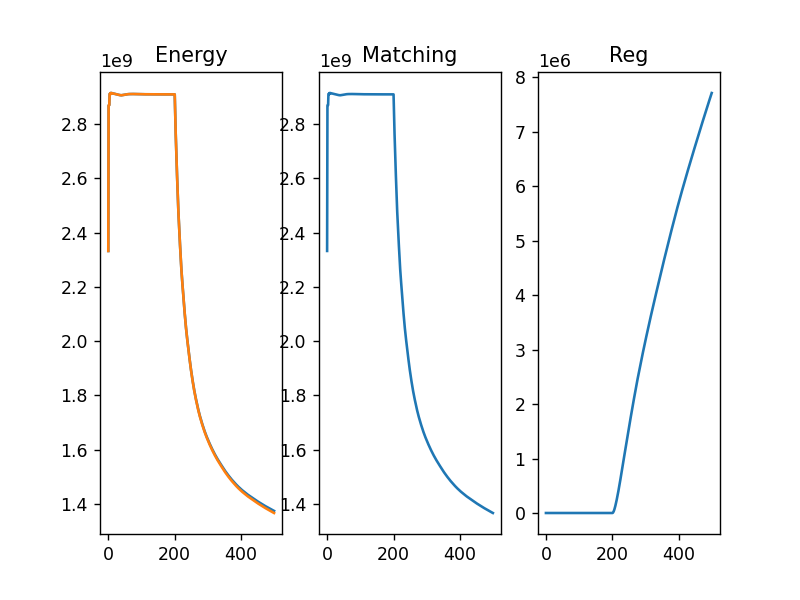

<IPython.core.display.Javascript object>


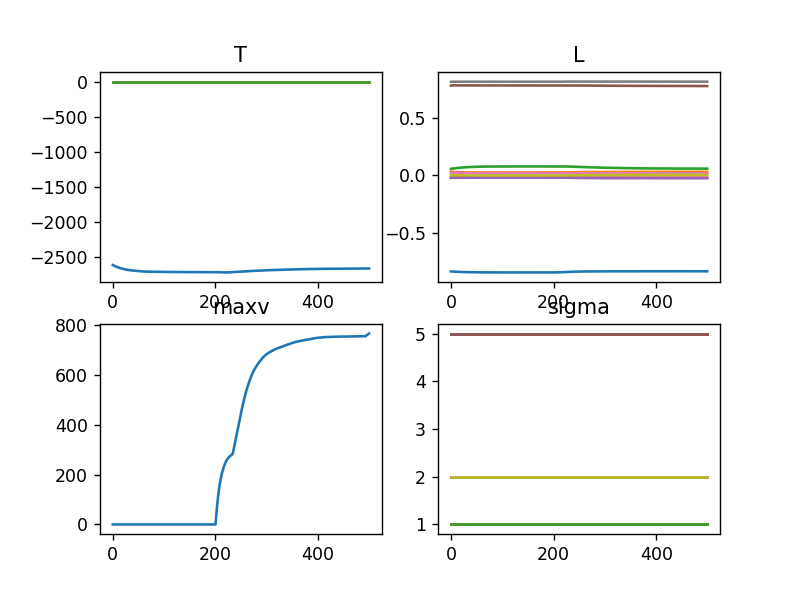

<IPython.core.display.Javascript object>


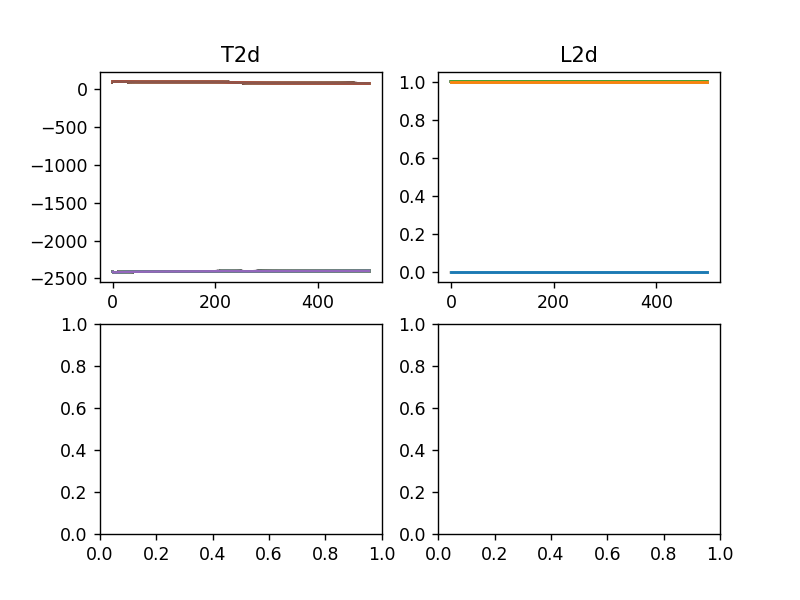

<IPython.core.display.Javascript object>


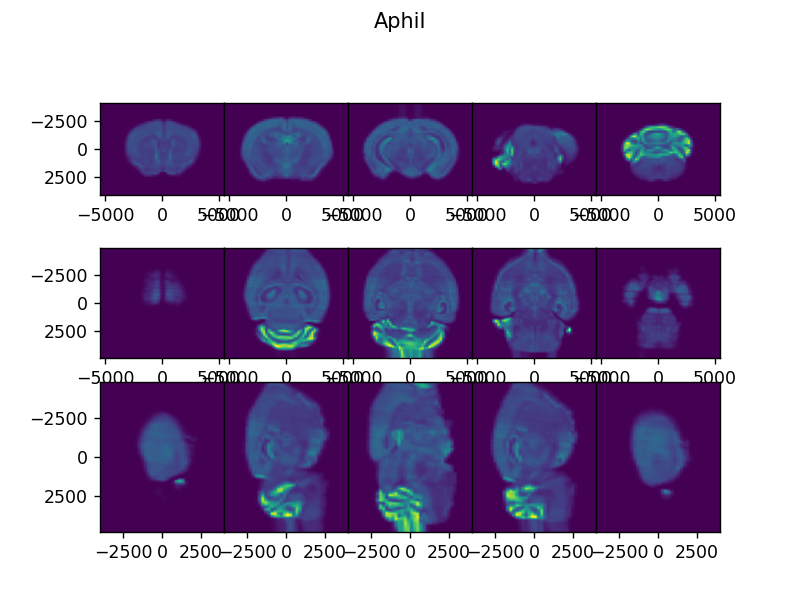

<IPython.core.display.Javascript object>


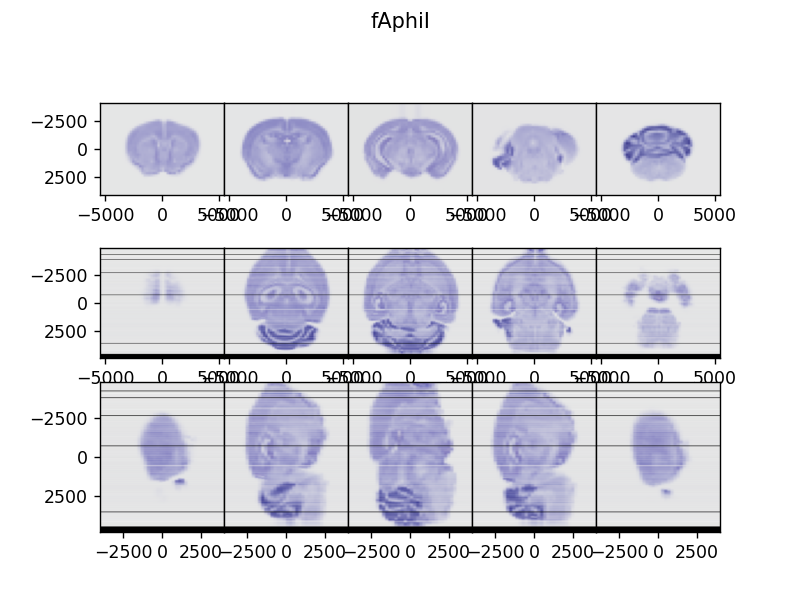

<IPython.core.display.Javascript object>


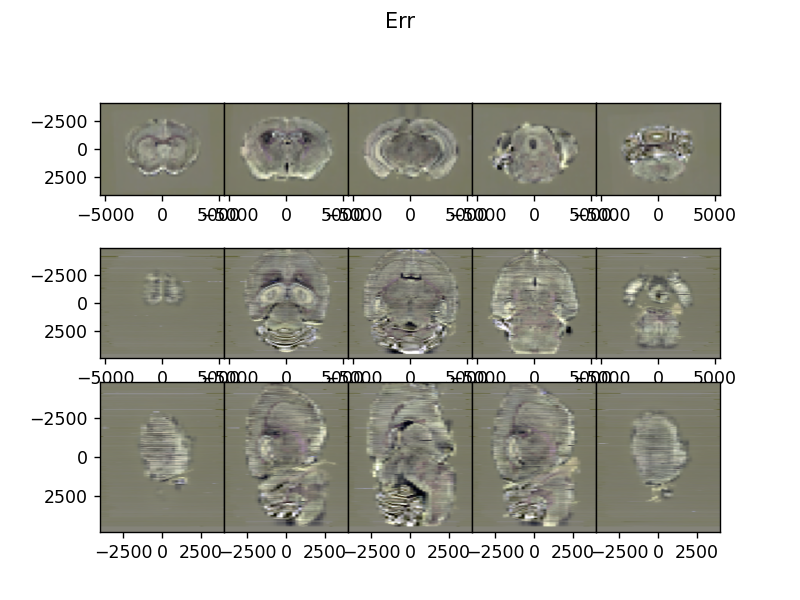

<IPython.core.display.Javascript object>


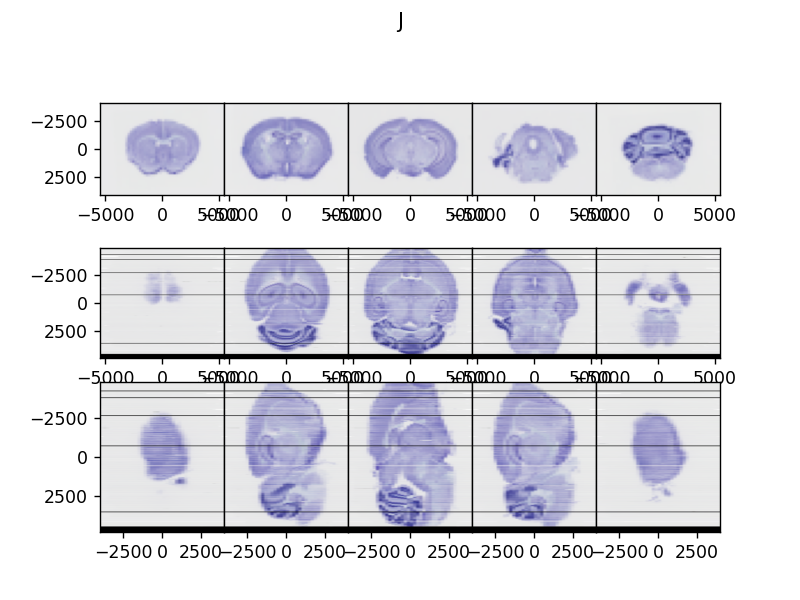

<IPython.core.display.Javascript object>


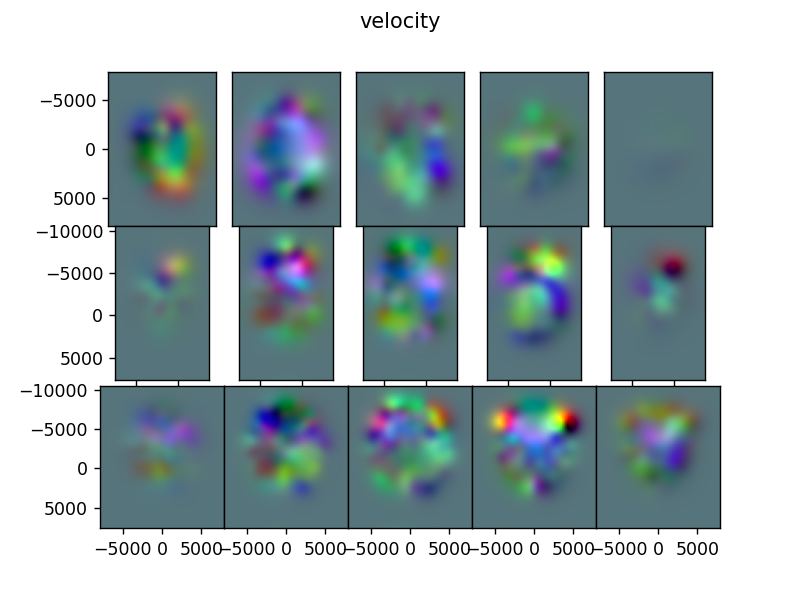

<IPython.core.display.Javascript object>


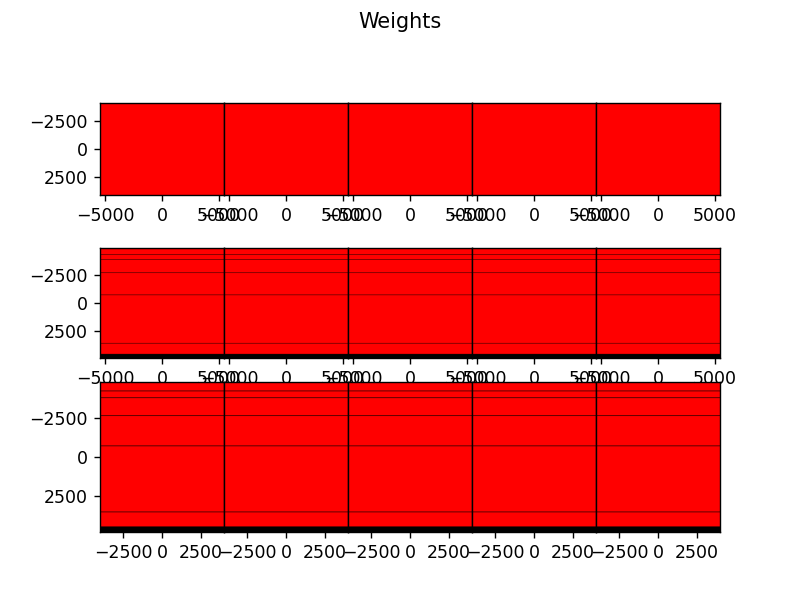

Iteration 40, linear oscilating, reducing eA to 9000000.0
Iteration 60, linear oscilating, reducing eA to 8100000.0
Iteration 90, linear oscilating, reducing eA to 7290000.0
Iteration 110, linear oscilating, reducing eA to 6561000.0
Iteration 120, linear oscilating, reducing eA to 5904900.0
Iteration 130, linear oscilating, reducing eA to 5314410.0
Iteration 140, linear oscilating, reducing eA to 4782969.0
Iteration 150, linear oscilating, reducing eA to 4304672.100000001
Iteration 160, linear oscilating, reducing eA to 3874204.8900000006
Iteration 170, linear oscilating, reducing eA to 3486784.4010000005
Iteration 180, linear oscilating, reducing eA to 3138105.9609000008
Iteration 190, linear oscilating, reducing eA to 2824295.3648100006
Iteration 200, linear oscilating, reducing eA to 2541865.8283290006
Iteration 310, linear oscilating, reducing eA to 2287679.2454961007
Iteration 350, linear oscilating, reducing eA to 2058911.3209464906
Iteration 380, linear oscilating, reducing eA t

<IPython.core.display.Javascript object>


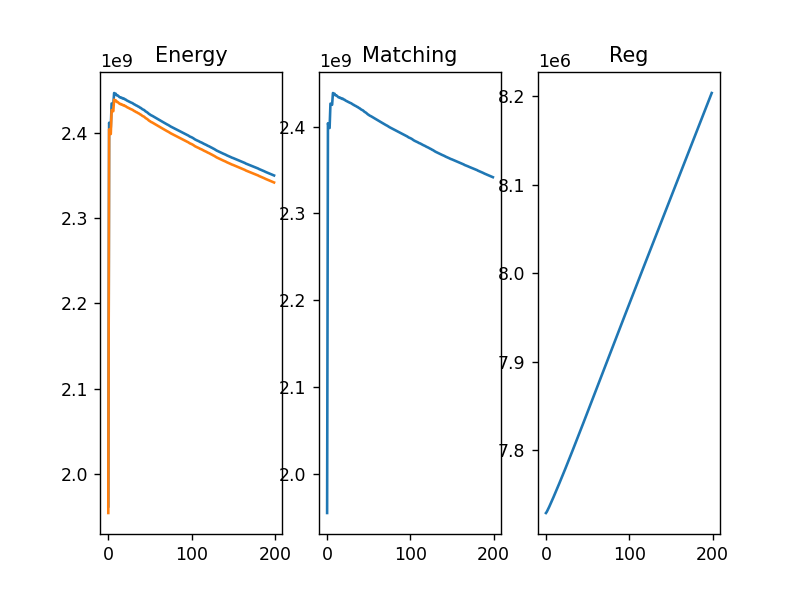

<IPython.core.display.Javascript object>


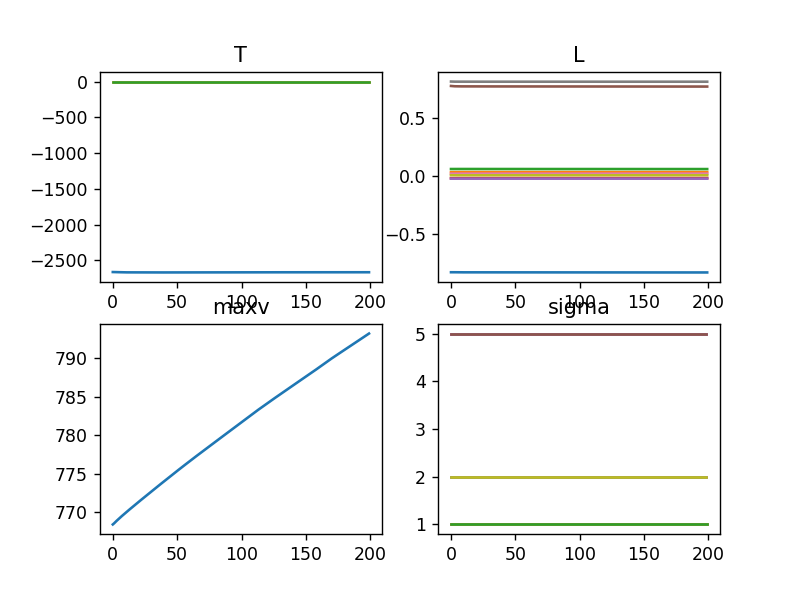

/home/brysongray/emlddmm/emlddmm.py:1089: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figA2d,axA2d = plt.subplots(2,2)


<IPython.core.display.Javascript object>


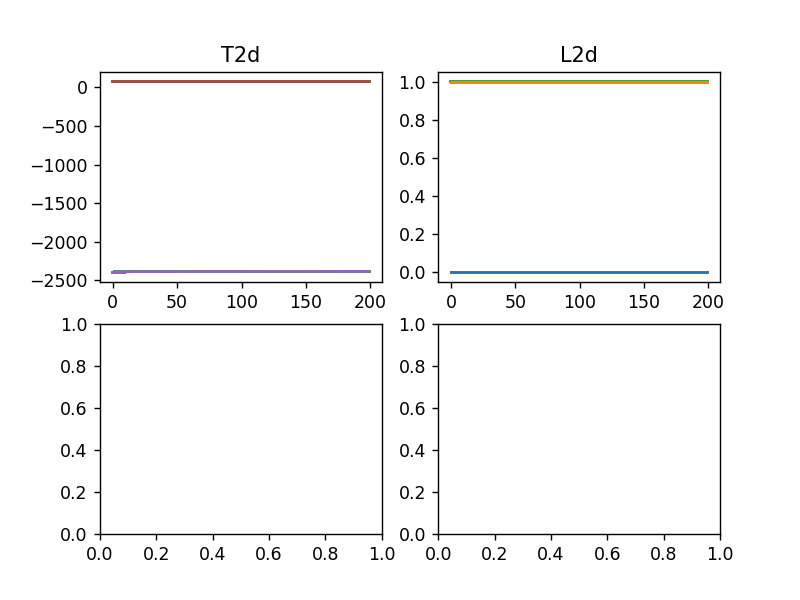

<IPython.core.display.Javascript object>


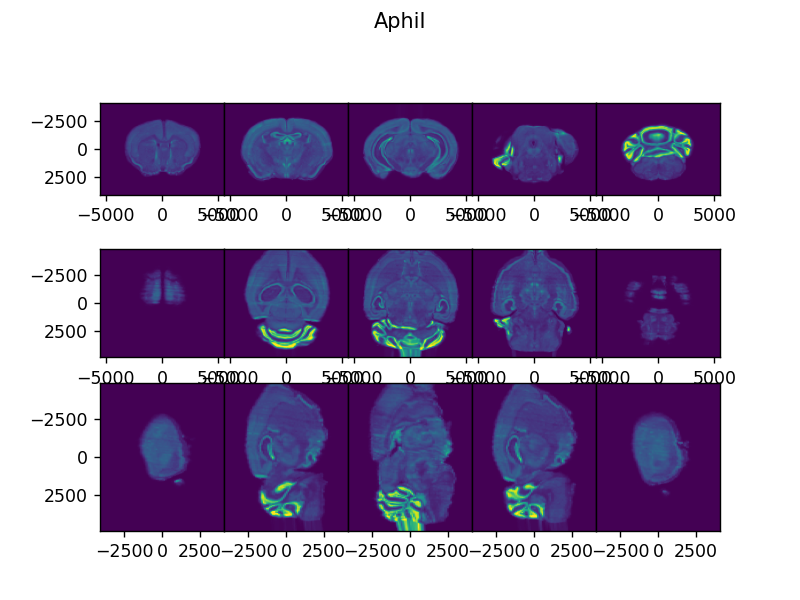

<IPython.core.display.Javascript object>


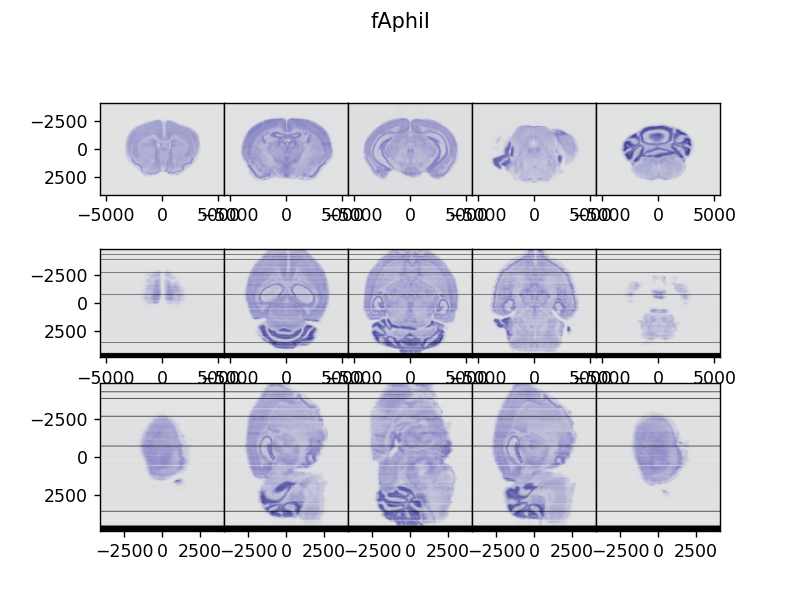

<IPython.core.display.Javascript object>


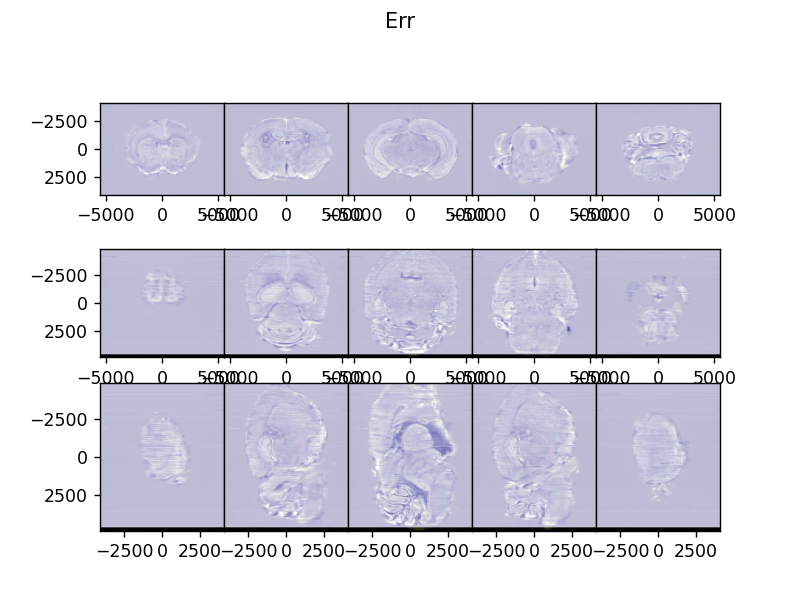

<IPython.core.display.Javascript object>


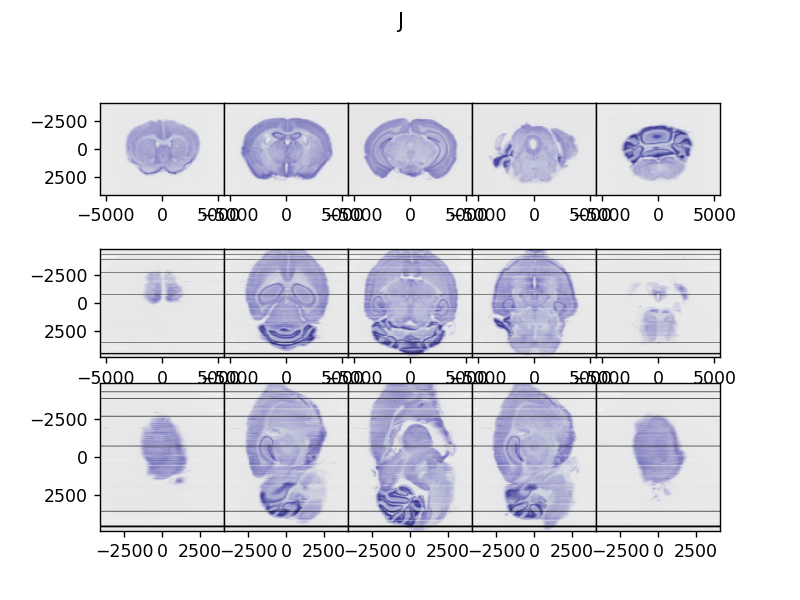

<IPython.core.display.Javascript object>


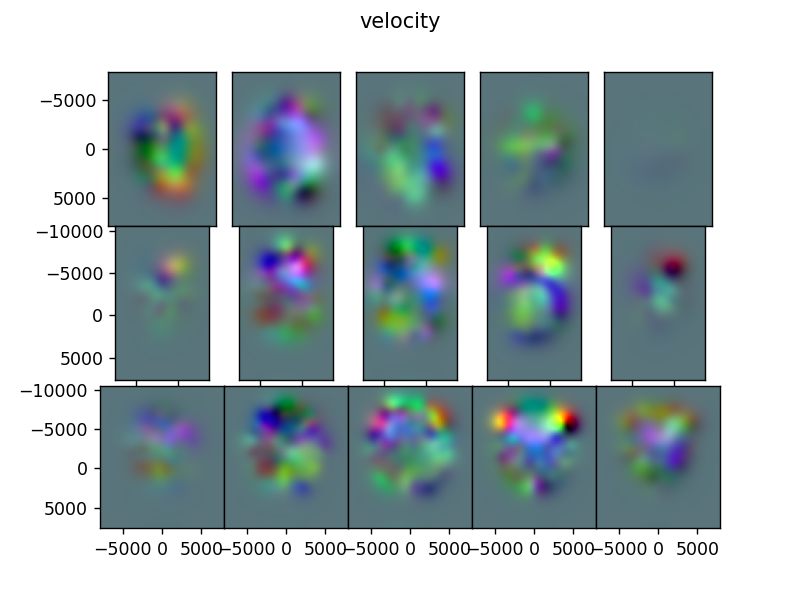

<IPython.core.display.Javascript object>


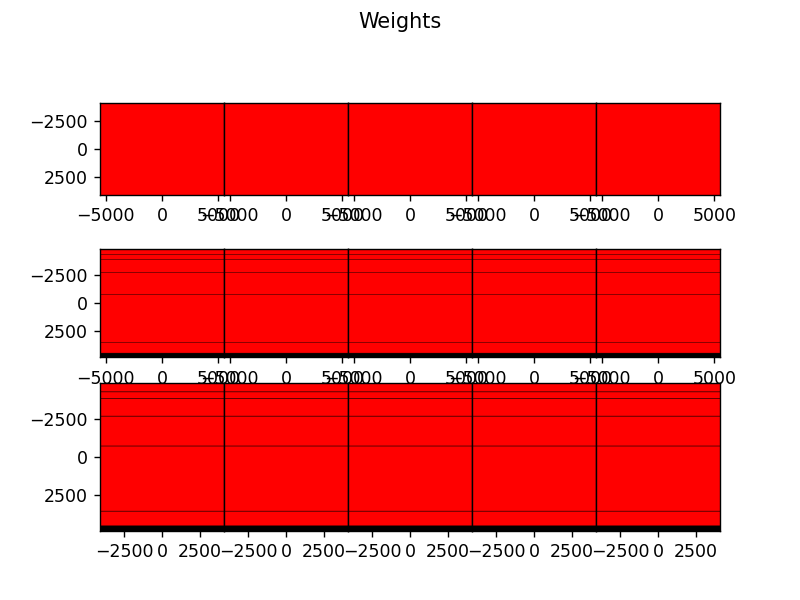

Iteration 20, linear oscilating, reducing eA to 4500000.0
Iteration 30, linear oscilating, reducing eA to 4050000.0
Iteration 40, linear oscilating, reducing eA to 3645000.0
Iteration 100, linear oscilating, reducing eA to 3280500.0
Iteration 150, translation oscilating, reducing eA to 2952450.0
Iteration 160, linear oscilating, reducing eA to 2657205.0
Iteration 180, linear oscilating, reducing eA to 2391484.5
output dir is /home/brysongray/data/csh_data/output2
cpu


<IPython.core.display.Javascript object>


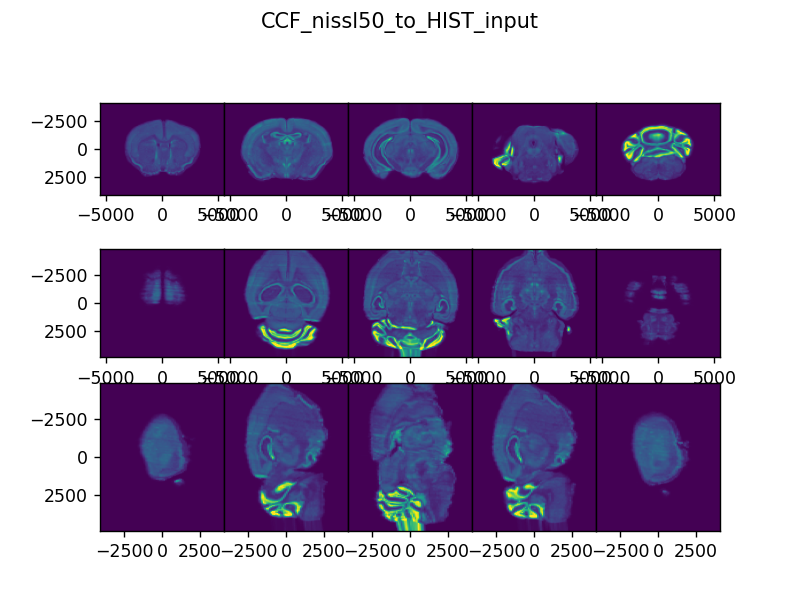

<IPython.core.display.Javascript object>


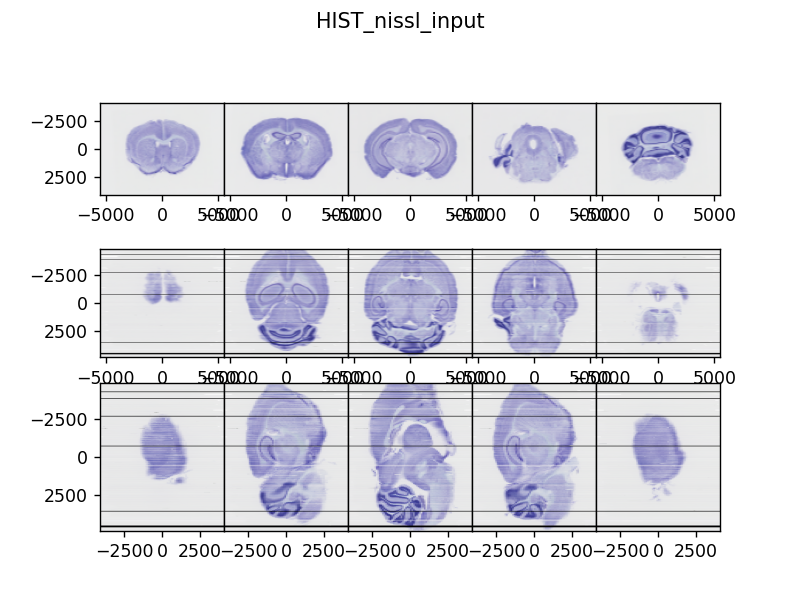

mean_translation: tensor([-2386.2610,    75.0406])


<IPython.core.display.Javascript object>


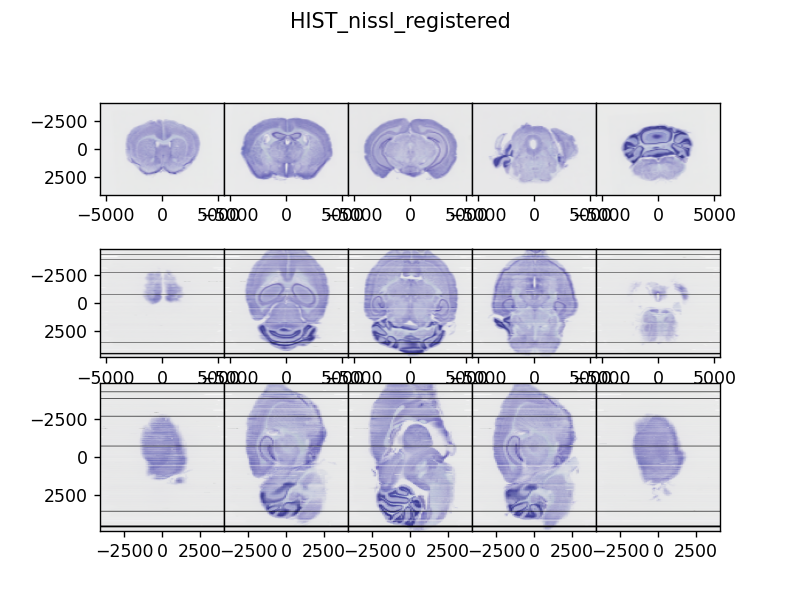

<IPython.core.display.Javascript object>


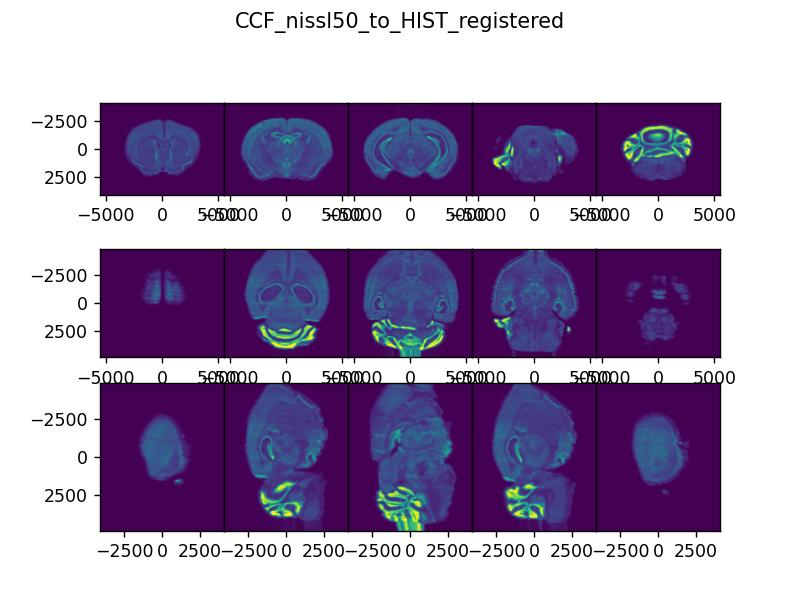

<IPython.core.display.Javascript object>


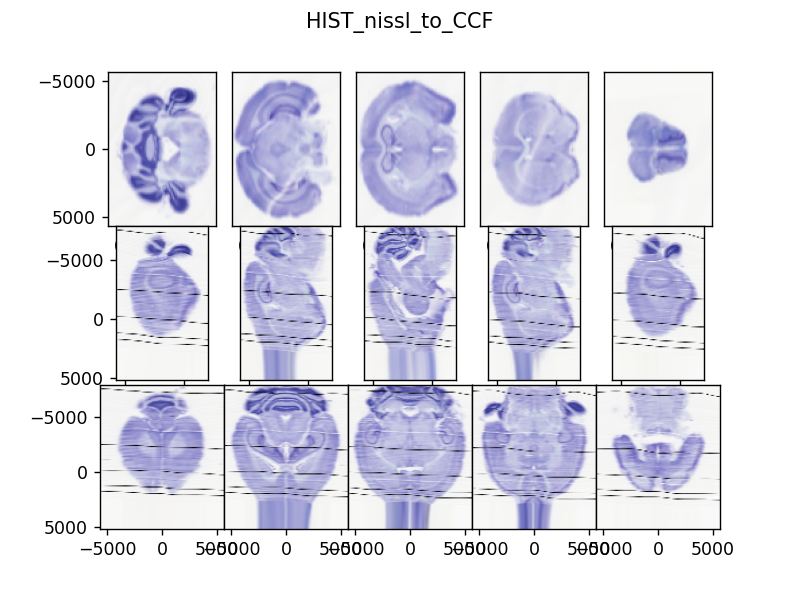

<IPython.core.display.Javascript object>


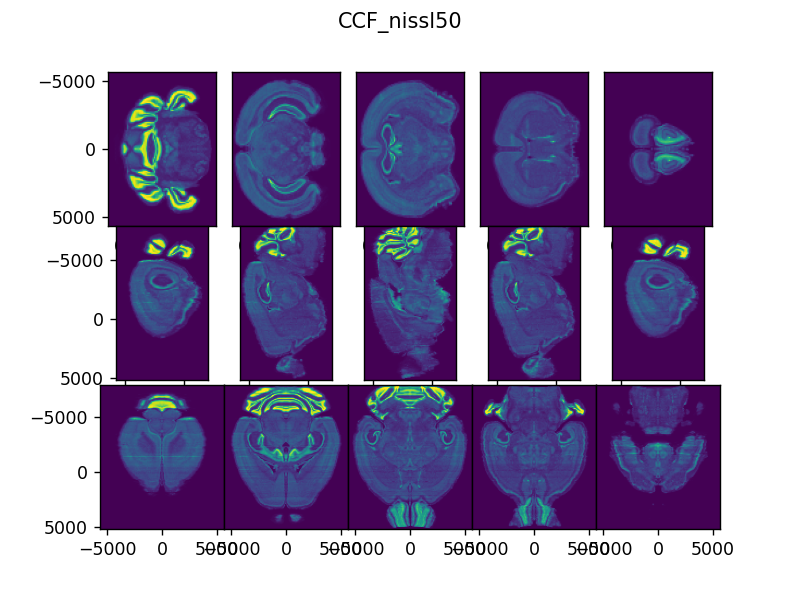

In [3]:
importlib.reload(emlddmm)
importlib.reload(tg)

output = reg_list[0]['output']

graph = tg.run_registrations(reg_list)
with open(os.path.join(output, 'graph.p'), 'wb') as f:
    pickle.dump(graph, f)

In [4]:
space_image_path = [
    ['CCF','nissl50', '/home/brysongray/data/csh_data/ara_nissl_50_bregma.vtk'],
    ['HIST', 'nissl', '/home/brysongray/data/csh_data/nissl']
]
# space_image_path = [
#     ['nissl','m519N', '/home/brysongray/data/marmoset_ccf/M519N-STIF_new/'],
#     ['myelin', 'm519M', '/home/brysongray/data/marmoset_ccf/m519M-STIF_new/']
# ]
# convert space_image_path to dictionary of dictionaries. (image_name:path key-values in a dict of space:img key-values)
sip = {} # space-image-path dictionary
for i in range(len(space_image_path)):
    if not space_image_path[i][0] in sip:
        sip[space_image_path[i][0]] = {}
    new_img = {space_image_path[i][1]: space_image_path[i][2]}
    sip[space_image_path[i][0]].update(new_img)

print(sip)

{'CCF': {'nissl50': '/home/brysongray/data/csh_data/ara_nissl_50_bregma.vtk'}, 'HIST': {'nissl': '/home/brysongray/data/csh_data/nissl'}}


reconstructing CCF nissl50 in HIST space
loading target images


<IPython.core.display.Javascript object>


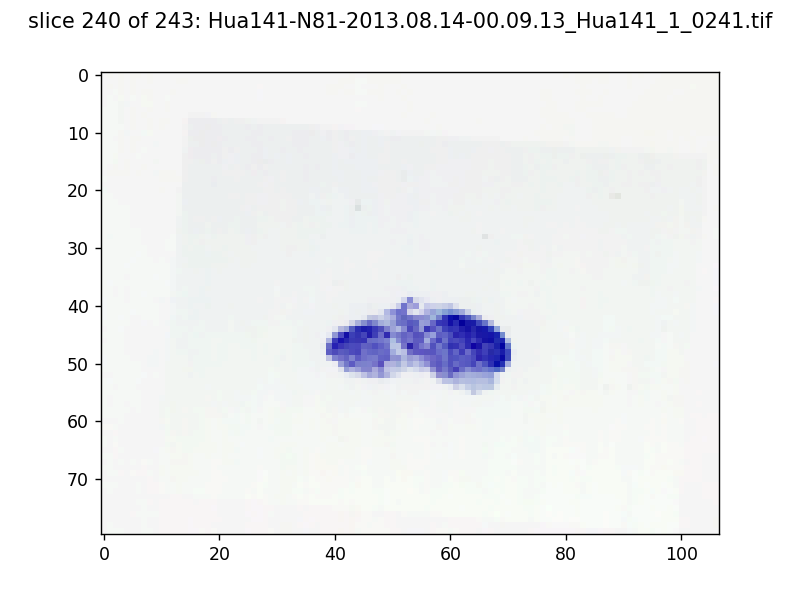

reconstructing HIST nissl in CCF space


In [35]:
importlib.reload(tg)
importlib.reload(emlddmm)

with open(os.path.join(output, 'graph.p'), 'rb') as f:
    graph = pickle.load(f)

# perform all reconstructions
for src_space in sip:
    for src_image in sip[src_space]:
        # reconstruct in every other space
        src_path = sip[src_space][src_image]
        I = emlddmm.Image(src_space, src_image, src_path, x=graph.spaces[src_space][1])
        for target_space in [n for n in sip if n != src_space]:
            target_image = list(sip[target_space].keys())[0]
            target_path = sip[target_space][target_image]
            if os.path.splitext(target_path)[-1] == '':
                fnames = emlddmm.fnames(target_path)
                tg.graph_reconstruct(graph, output, I, target_space, target_fnames=fnames)
            else:
                tg.graph_reconstruct(graph, output, I, target_space)

In [16]:
with open('/home/brysongray/data/csh_data/mouse_data/reg_outputs/graph.p', 'rb') as f:
    graph = pickle.load(f)


In [19]:
path = graph.shortest_path(0, 1)
transforms = graph.transforms(path)

In [20]:
print(transforms)

[Transform with data size torch.Size([3, 168, 49, 66]), direction f, and domain <class 'list'>, Transform with data size torch.Size([4, 4]), direction f, and domain <class 'NoneType'>, Transform with data size torch.Size([240, 3, 3]), direction f, and domain <class 'NoneType'>]


<IPython.core.display.Javascript object>


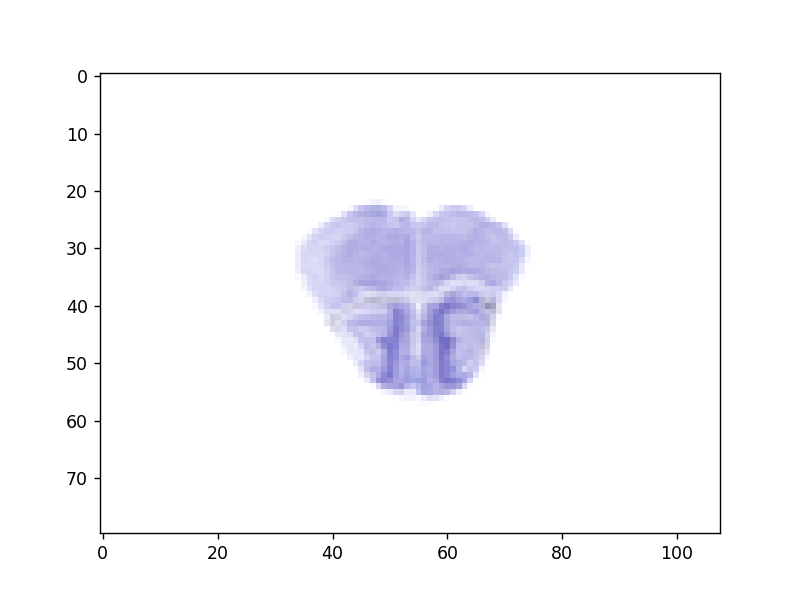

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [26]:
# img = '/home/brysongray/data/csh_data/output2/HIST_registered/CCF_nissl50_to_HIST_registered/images/CCF_nissl50_to_HIST_registered_Hua141-N45-2013.08.18-20.37.04_Hua141_3_0135.vtk'
img = '/home/brysongray/data/csh_data/output2/HIST_registered/HIST_input_to_HIST_registered/images/HIST_input_Hua141-N1-2013.08.18-17.25.48_Hua141_2_0002_to_HIST_registered_Hua141-N1-2013.08.18-17.25.48_Hua141_2_0002.vtk'
x, I, _,_ = emlddmm.read_data(img)
plt.figure()
plt.imshow(I[:,0,...].transpose(1,2,0))

<IPython.core.display.Javascript object>


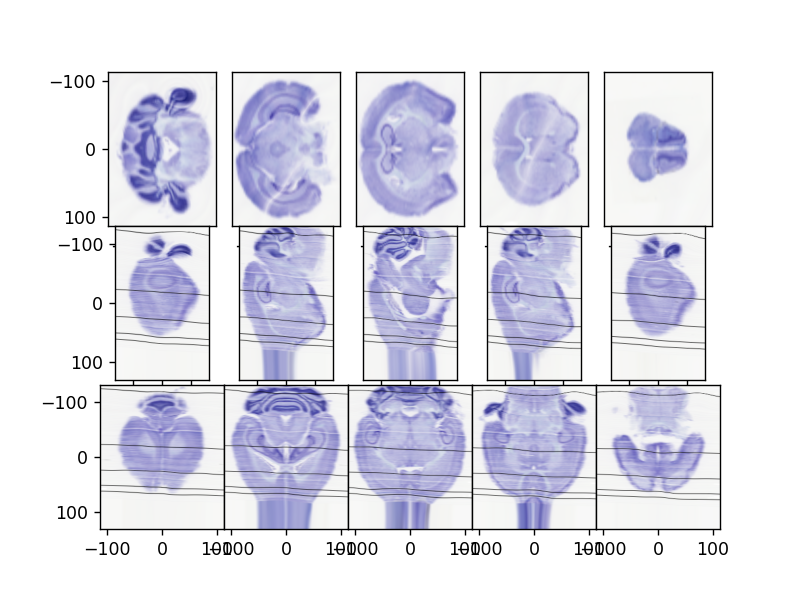

(<Figure size 640x480 with 15 Axes>,
 [[<AxesSubplot:>,
   <AxesSubplot:>,
   <AxesSubplot:>,
   <AxesSubplot:>,
   <AxesSubplot:>],
  [<AxesSubplot:>,
   <AxesSubplot:>,
   <AxesSubplot:>,
   <AxesSubplot:>,
   <AxesSubplot:>],
  [<AxesSubplot:>,
   <AxesSubplot:>,
   <AxesSubplot:>,
   <AxesSubplot:>,
   <AxesSubplot:>]])

In [36]:
img = '/home/brysongray/data/csh_data/output2/CCF/HIST_nissl_input_to_CCF/images/HIST_nissl_input_to_CCF.vtk'
x, I, _,_ = emlddmm.read_data(img)
emlddmm.draw(I)

In [16]:
print([type(x) for x in I])

[<class 'list'>, <class 'numpy.ndarray'>, <class 'str'>, <class 'list'>]
